In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import os
import sys
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
%matplotlib inline


#Load utility functions from the utils.py file

sys.path.insert(0,'utils.py')
from utils import *

In [2]:
dataFolder = '/Users/roshansk/Documents/PDSG/Projects/PayInequality/Data'
paynet_dataFolder = '/Users/roshansk/Documents/PDSG/Projects/PayInequality/Data/reduced_paynet_data'

In [3]:
dfcp = pd.read_csv(os.path.join(dataFolder, 'Company_Profiler.csv' ))

In [4]:
dfcp.head()

,KF_ID,num_rows,num_years,IndustryName,IndustrySegmentName
0,1,8,1,['Financials'],['Consumer Finance']
1,2,14058,7,"['Consumer Services', 'Retail (Services)']","['Specialized Consumer Services', 'unknown']"
2,3,87477,10,"['Consumer Goods', 'Fast Moving Consumer Goods...","['Household and Personal Care', 'unknown']"
3,4,30390,10,"['Retailers (Services)', 'Consumer Services', ...","['unknown', 'Food Retailers and Wholesalers']"
4,5,77,2,['Industrials'],"['Transportation Infrastructure', 'Road and Ra..."


## Select Company

In [5]:
kf_id = 4

In [6]:
use_cols = ['KF_ID','CalendarYear','RegionName','IndustryName','JobName','ReferenceLevelNum','IncumbentPointCount','Base Salary','Total Cash']

In [7]:
df = getCompanyData(paynet_dataFolder, kf_id = kf_id, use_cols = use_cols)

100%|██████████| 29/29 [00:34<00:00,  1.18s/it]


In [125]:
len(df)

30390

In [ ]:
if max(df.ReferenceLevelNum) == 99:
    numRows = len(df[df.ReferenceLevelNum==99])
    df = df[df.ReferenceLevelNum<99]
    
    print(f"The dataset had {numRows} rows with ReferenceLevelNum values of 99, these were dropped")
    
    
df['Salary_by_ref'] = df['Base Salary']/df.ReferenceLevelNum

df['Salary_by_incum'] = df['Base Salary']/df.IncumbentPointCount

## Cleaning data of outliers
cleanDf = removeOutliersYearwise(df, ['Base Salary', 'Salary_by_ref','Salary_by_incum'])

## Basic Stats

array([1.1086e+04, 1.4350e+04, 1.8010e+03, 1.9870e+03, 5.0700e+02,
       1.6500e+02, 2.1000e+01, 3.9000e+01, 3.3000e+01, 0.0000e+00,
       3.0000e+00, 0.0000e+00, 2.3000e+01, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00])

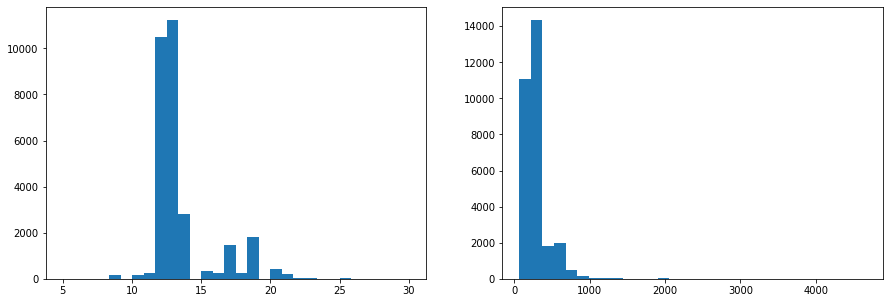

In [23]:
plt.figure(figsize= (15,5))
plt.subplot(121)
plt.hist(df.ReferenceLevelNum,bins=30)[0]

plt.subplot(122)
plt.hist(df.IncumbentPointCount,bins=30)[0]

In [24]:
df.IncumbentPointCount.describe()

count    30021.000000
mean       291.043037
std        168.919583
min         67.000000
25%        210.000000
50%        248.000000
75%        291.000000
max       4656.000000
Name: IncumbentPointCount, dtype: float64

In [48]:
# Number of records/data points for the company

print(dfcp[dfcp.KF_ID==kf_id]['num_rows'].values[0])

30390


In [49]:
# Number of years for which we have the data
print(dfcp[dfcp.KF_ID==kf_id]['num_years'].values[0])

10


In [50]:
# IndustryName for the company

print(eval(dfcp[dfcp.KF_ID==kf_id]['IndustryName'].values[0]))

['Retailers (Services)', 'Consumer Services', 'Retail (Services)']


In [51]:
# IndustrySegmentName for the company

print(eval(dfcp[dfcp.KF_ID==kf_id]['IndustrySegmentName'].values[0]))

['unknown', 'Food Retailers and Wholesalers']


In [67]:
df.head()

,KF_ID,CalendarYear,RegionName,OwnershipTypeDesc,NumOfEmpDesc,IndustryName,IndustrySectorName,IndustrySegmentName,JobName,ReferenceLevelNum,...,Benefit Values,Fixed Annual Remuneration,Long Term Incentive Values,Short Term Variable Payments,Target Incentive Payment (%),Total Annual Remuneration,Total Cash,Total Direct Compensation,Total Remuneration Plus,Total Earnings
691776,3,2010,NaN,1.0,8.0,Diversified Industrials (Industrial/Mfg.),NaN,NaN,Quality Assurance/Quality Control Technician I...,10,...,NaN,NaN,NaN,NaN,NaN,NaN,36400.0,36400.0,NaN,NaN
691777,3,2010,NaN,1.0,8.0,Diversified Industrials (Industrial/Mfg.),NaN,NaN,General Clerk IV - 1237,11,...,NaN,NaN,NaN,NaN,NaN,NaN,50536.0,50536.0,NaN,NaN
691778,3,2010,NaN,1.0,8.0,Diversified Industrials (Industrial/Mfg.),NaN,NaN,Accounting Clerk IV - 1009,11,...,NaN,NaN,NaN,NaN,NaN,NaN,35419.0,35419.0,NaN,NaN
691779,3,2010,NaN,1.0,8.0,Diversified Industrials (Industrial/Mfg.),NaN,NaN,Accounting Clerk IV - 1009,11,...,NaN,NaN,NaN,NaN,NaN,NaN,37028.0,37028.0,NaN,NaN
691780,3,2010,NaN,1.0,8.0,Diversified Industrials (Industrial/Mfg.),NaN,NaN,Accounting Clerk IV - 1009,11,...,NaN,NaN,NaN,NaN,NaN,NaN,38040.0,38040.0,NaN,NaN


## Base Variables

### ReferenceLevelNum

<a list of 10 Patch objects>

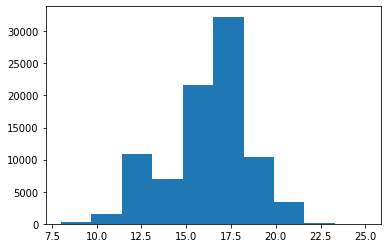

In [78]:
plt.hist(df.ReferenceLevelNum)[2]

In [81]:
df.ReferenceLevelNum.describe()

count    87477.000000
mean        16.276164
std          2.238307
min          8.000000
25%         15.000000
50%         17.000000
75%         18.000000
max         25.000000
Name: ReferenceLevelNum, dtype: float64

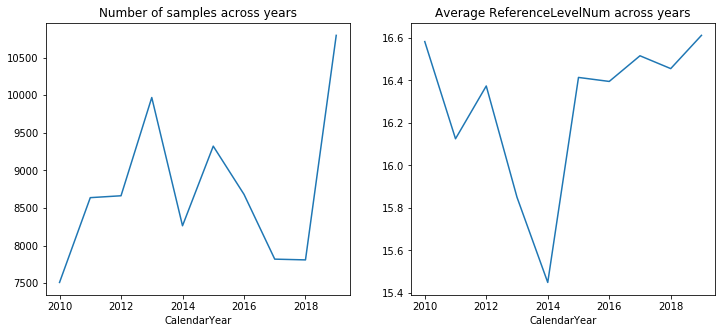

In [99]:
refYears = df.groupby('CalendarYear')['ReferenceLevelNum'].mean()
rowYears = df.groupby('CalendarYear')['ReferenceLevelNum'].count()

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.title("Number of samples across years")
sns.lineplot(y = rowYears.values, x = rowYears.index)

plt.subplot(122)
plt.title("Average ReferenceLevelNum across years")
sns.lineplot(y = refYears.values,x = refYears.index)

### Base Salary

<a list of 10 Patch objects>

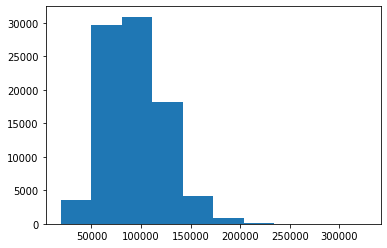

In [101]:
plt.hist(df['Base Salary'])[2]

In [103]:
df['Base Salary'].describe()

count     87477.000000
mean      93402.670119
std       30025.016194
min       19160.000000
25%       70448.000000
50%       89847.000000
75%      113111.000000
max      326240.000000
Name: Base Salary, dtype: float64

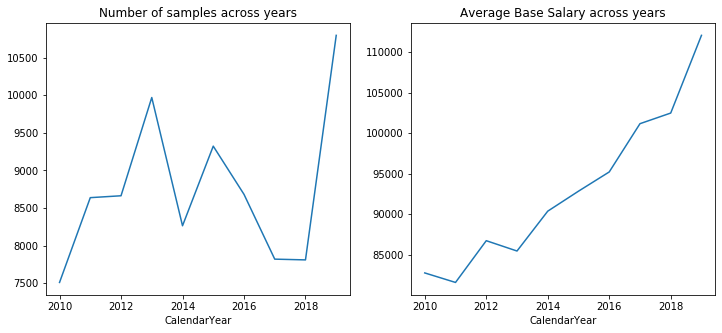

In [104]:
refYears = df.groupby('CalendarYear')['Base Salary'].mean()
rowYears = df.groupby('CalendarYear')['Base Salary'].count()

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.title("Number of samples across years")
sns.lineplot(y = rowYears.values, x = rowYears.index)

plt.subplot(122)
plt.title("Average Base Salary across years")
sns.lineplot(y = refYears.values,x = refYears.index)

### Total Cash

<a list of 10 Patch objects>

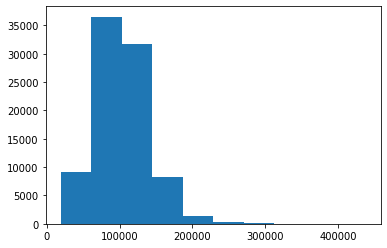

In [105]:
plt.hist(df['Total Cash'])[2]

In [106]:
df['Total Cash'].describe()

count     87477.000000
mean     103321.310630
std       35595.336316
min       19160.000000
25%       76887.000000
50%      100632.000000
75%      125246.000000
max      437545.000000
Name: Total Cash, dtype: float64

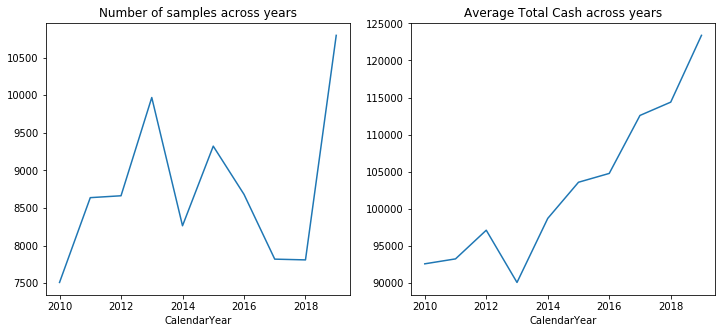

In [107]:
refYears = df.groupby('CalendarYear')['Total Cash'].mean()
rowYears = df.groupby('CalendarYear')['Total Cash'].count()

plt.figure(figsize = (12,5))
plt.subplot(121)
plt.title("Number of samples across years")
sns.lineplot(y = rowYears.values, x = rowYears.index)

plt.subplot(122)
plt.title("Average Total Cash across years")
sns.lineplot(y = refYears.values,x = refYears.index)

## Relationship between Skill and Salary

In [1]:
# salaryVariable = 'Base Salary'

# ## For outlier removal
# lowerLimit = 0.001
# upperLimit = 0.999



# ############# REMOVE OUTLIERS ###############

# subDf = df.copy()

# salaryLowLimit, salaryUpLimit = df[salaryVariable ].quantile(lowerLimit), df[salaryVariable ].quantile(upperLimit)

# skillLowLimit, skillUpLimit = df['IncumbentPointCount'].quantile(lowerLimit), df['IncumbentPointCount'].quantile(upperLimit)

# subDf = subDf[subDf[salaryVariable ].between(salaryLowLimit, salaryUpLimit)]

# subDf = subDf[subDf['IncumbentPointCount'].between(skillLowLimit, skillUpLimit)]


# #############################################



# lrModel = LinearRegression()

# lrModel.fit(df.IncumbentPointCount.values.reshape(-1,1), df[salaryVariable])

# print("Base model")
# print(f'Slope : {np.round(lrModel.coef_[0],2)} Intercept : {np.round(lrModel.intercept_,2)}')
# print("--------")


# X = subDf['IncumbentPointCount'].values.reshape(-1,1)
# y = subDf[salaryVariable]

# lrModel.fit(X,y)

# print(f'Slope : {np.round(lrModel.coef_[0],2)} Intercept : {np.round(lrModel.intercept_,2)}')




Slope : [151.93] Intercept : 1789.02


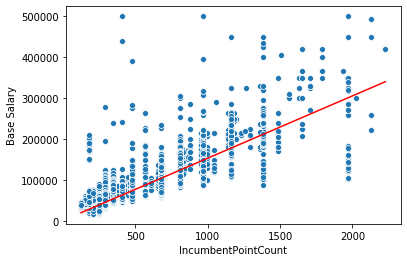

In [13]:
out = perform_skill_salary_analysis(df, 'Base Salary', 'IncumbentPointCount', removeOutlier=True)

Slope : [10380.2] Intercept : -94876.26


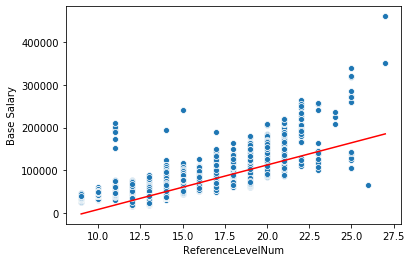

In [14]:
out = perform_skill_salary_analysis(df, 'Base Salary', 'ReferenceLevelNum', removeOutlier=True)

Slope : [188.46] Intercept : 18341.29


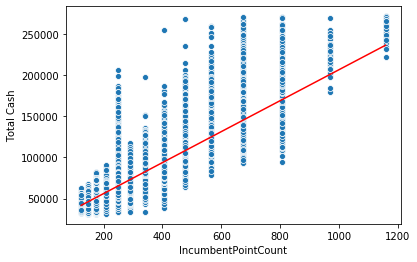

In [184]:
out = perform_skill_salary_analysis(df, 'Total Cash', 'IncumbentPointCount', removeOutlier=True)

Slope : [11838.51] Intercept : -111865.32


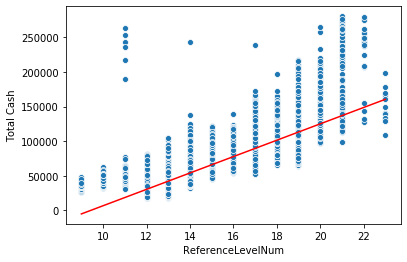

In [25]:
out = perform_skill_salary_analysis(df, 'Total Cash', 'ReferenceLevelNum', removeOutlier=True)

Slope : [ 1.7403e+02 -2.0000e-02] Intercept : 18595.02


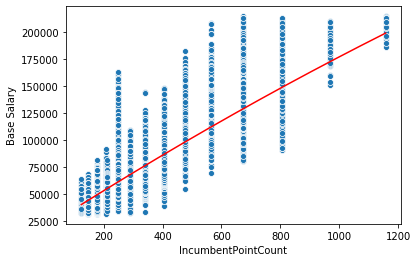

In [183]:
out = perform_skill_salary_analysis(df, 'Base Salary', 'IncumbentPointCount', maxPower=2, removeOutlier=True, plot = True)

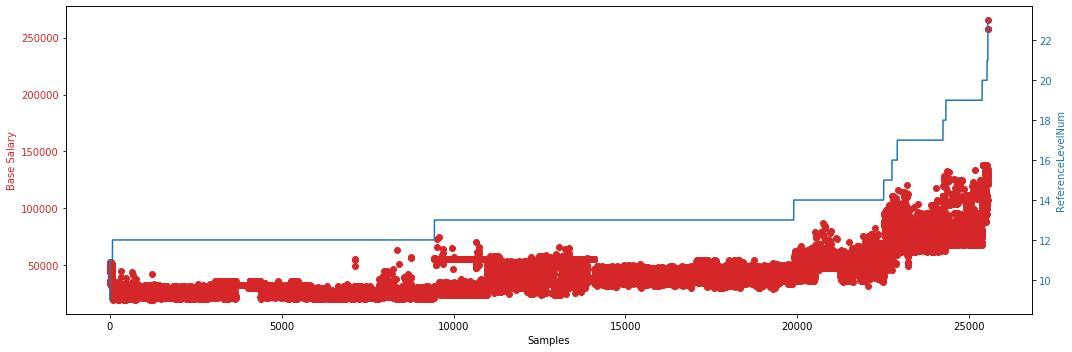

In [32]:
skillSalaryPlot(cleanDf, salaryVariable='Base Salary', skillVariable='ReferenceLevelNum')

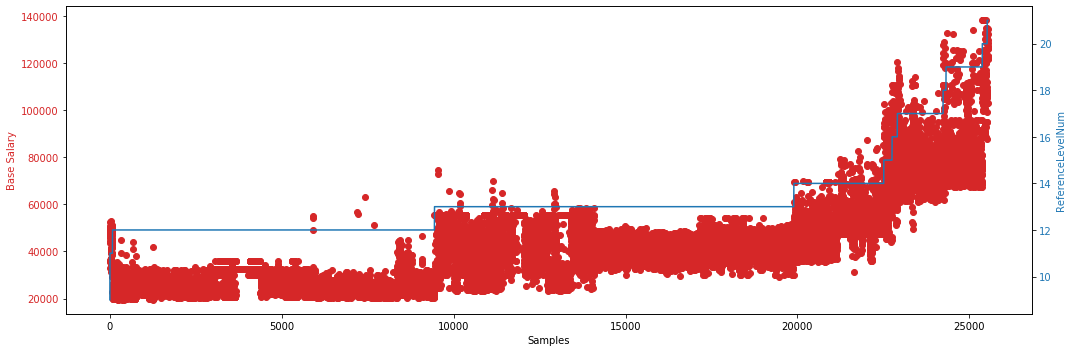

In [33]:
skillSalaryPlot(cleanDf, salaryVariable='Base Salary', skillVariable='ReferenceLevelNum', salaryLimits=[0,180000])

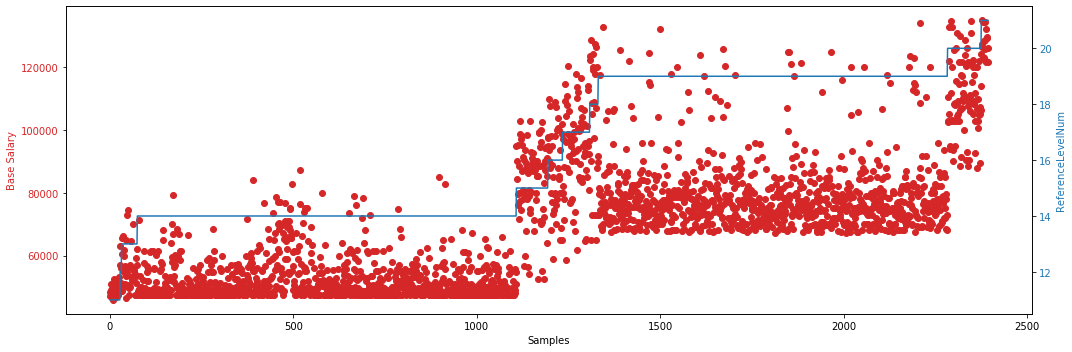

In [34]:
skillSalaryPlot(cleanDf[cleanDf.CalendarYear == 2018], salaryVariable='Base Salary', skillVariable='ReferenceLevelNum', salaryLimits=[0,180000])

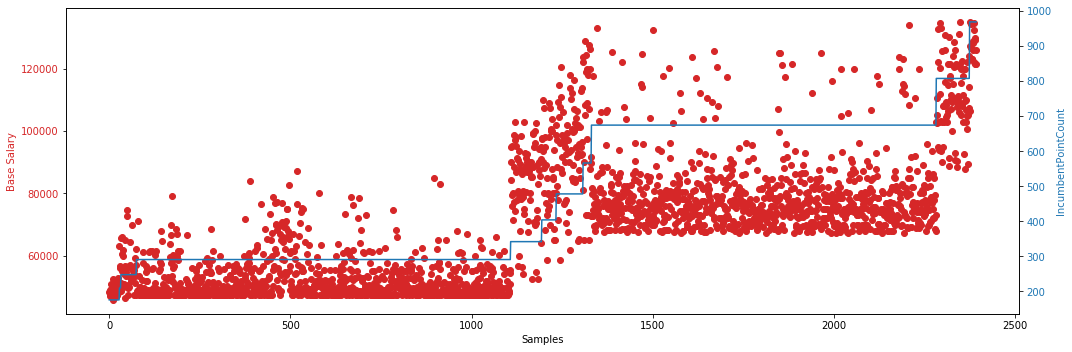

In [35]:
skillSalaryPlot(cleanDf[cleanDf.CalendarYear == 2018], salaryVariable='Base Salary', skillVariable='IncumbentPointCount', salaryLimits=[0,180000])

## Salary Characteristics

### Base Salary Growth

In [28]:
df.head()

,KF_ID,CalendarYear,RegionName,IndustryName,JobName,ReferenceLevelNum,IncumbentPointCount,Base Salary,Total Cash,Salary_by_ref,Salary_by_incum
0,4,2008,42.0,Retailers (Services),Store Manager I - 1385,13,261,40000.0,40000.0,3076.923077,153.256705
1,4,2008,42.0,Retailers (Services),Store Manager I - 1385,13,261,41000.0,41000.0,3153.846154,157.088123
2,4,2008,42.0,Retailers (Services),Store Manager I - 1385,13,261,38000.0,38000.0,2923.076923,145.593870
3,4,2008,42.0,Retailers (Services),Store Manager I - 1385,13,261,40000.0,40000.0,3076.923077,153.256705
4,4,2008,42.0,Retailers (Services),Store Manager I - 1385,13,261,35000.0,35000.0,2692.307692,134.099617


In [36]:
out = cleanDf.groupby("CalendarYear").agg({'Salary_by_ref':'mean','KF_ID':'count'})
out = out.reset_index()
out.columns = ['CalendarYear','Salary_by_ref','numRows']
out

,CalendarYear,Salary_by_ref,numRows
0,2008,2524.002189,3105
1,2009,2533.277718,3051
2,2010,2552.448087,2666
3,2011,2686.025311,4408
4,2012,3525.056209,2503
5,2013,2872.874240,2221
6,2014,3196.838650,1467
7,2015,11652.680501,3
8,2016,3505.581895,3728
9,2018,4181.275710,2394


In [42]:
def SalaryByYearPlot(df, salaryVariable, salaryLimits = None, countLimits = None):
    """
    y1 : Salary Variable
    y2 : Count Variable
    """
    
    fig, ax1 = plt.subplots(figsize = (15,5))
    
    
    out = df.groupby("CalendarYear").agg({salaryVariable:'mean','KF_ID':'count'})
    out = out.reset_index()
    out.columns = ['CalendarYear',salaryVariable,'numRows']
    
    df = out.copy()
    
    if salaryLimits is not None:
        if salaryLimits[0] is None:
            salaryLimits[0] = min(df[salaryVariable])
        if salaryLimits[1] is None:
            salaryLimits[1] = max(df[salaryVariable])
            
        df = df[df[salaryVariable].between(salaryLimits[0], salaryLimits[1])]
            
    if countLimits is not None:
        if countLimits[0] is None:
            countLimits[0] = min(df['numRows'])
        if countLimits[1] is None:
            countLimits[1] = max(df['numRows'])
            
        df = df[df['numRows'].between(countLimits[0], countLimits[1])]

            

    df = df.sort_values('CalendarYear')
    x = df.CalendarYear
    

    color = 'tab:red'
    ax1.set_xlabel('CalendarYear')
    ax1.set_ylabel(salaryVariable, color=color)
    ax1.plot(x, df[salaryVariable], color=color)
    ax1.tick_params(axis='y', labelcolor=color)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('# of Samples', color=color)  # we already handled the x-label with ax1
    ax2.plot(x, df['numRows'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    

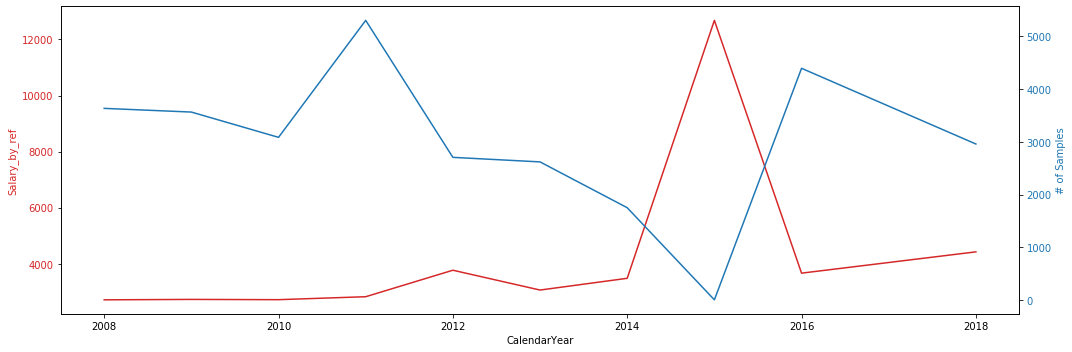

In [43]:
SalaryByYearPlot(df,'Salary_by_ref')

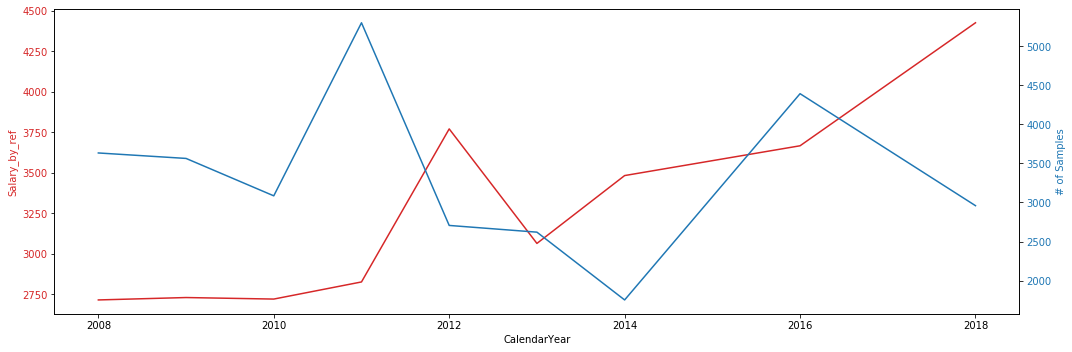

In [44]:
SalaryByYearPlot(df,'Salary_by_ref',countLimits=[100,None])

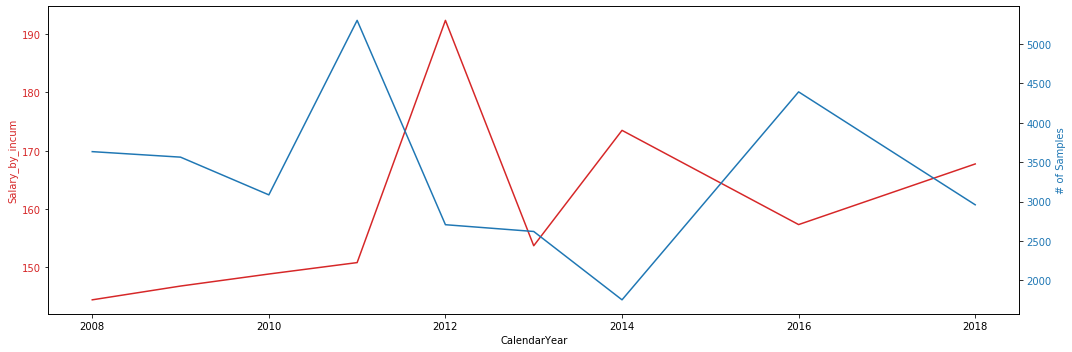

In [45]:
SalaryByYearPlot(df,'Salary_by_incum',countLimits=[100,None])